# Imports

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

## d. Train het network

### The Fish dataset

[bron](https://www.kaggle.com/datasets/aungpyaeap/fish-market)
Er wordt gekeken hoe precies een vissoort voorspelt kan worden op basis van zijn eigenschappen.

In [260]:
df = pd.read_csv('../data/Fish.csv') #read fish csv file

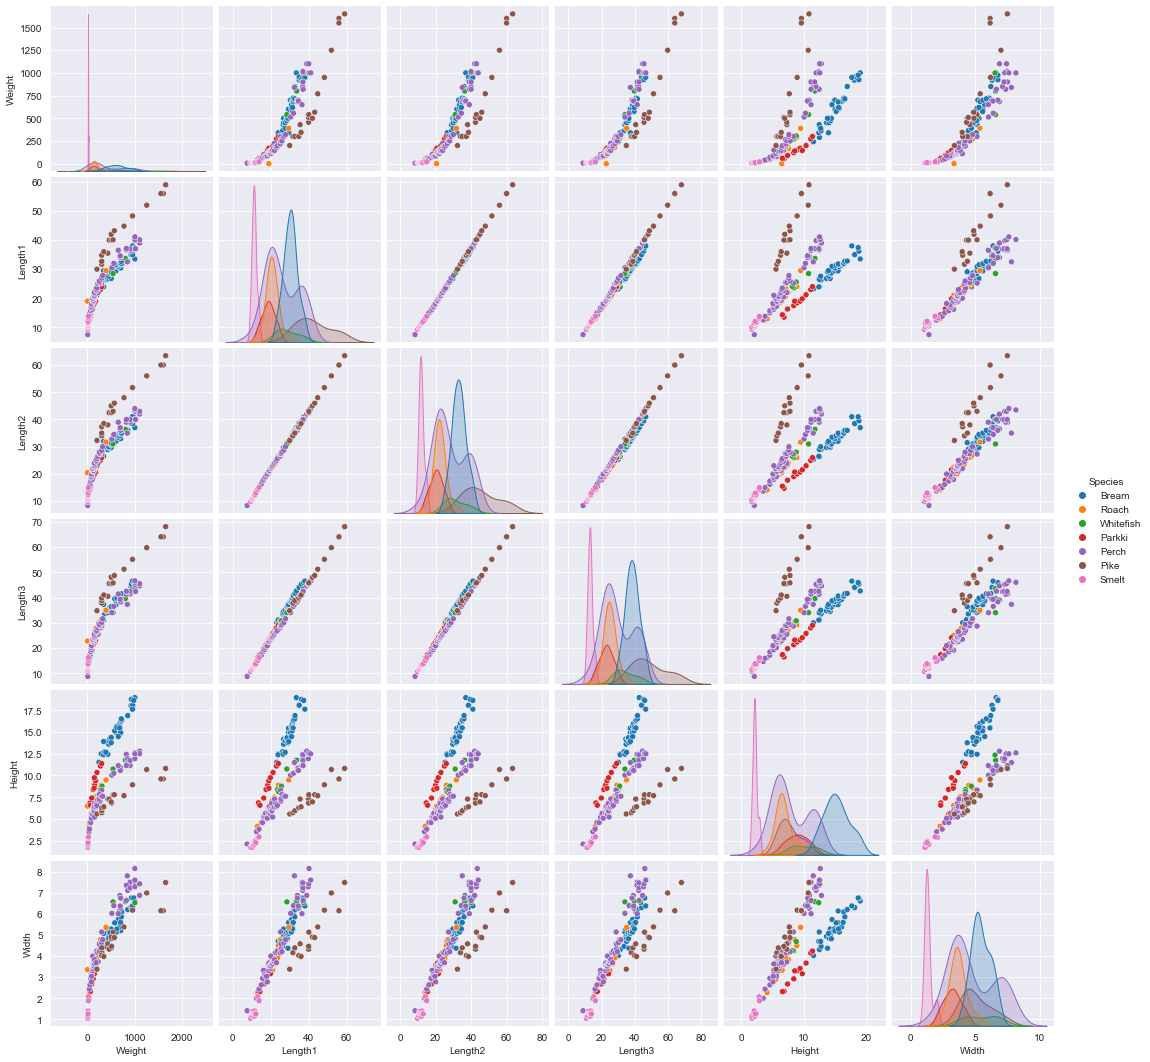

In [261]:
import seaborn as sns
sns.pairplot(df, hue="Species") #pairplot om te zien of er veel verschil te vinden is tussen de species.

In [262]:
df.head() #lees de head van de data om een idee te krijgen van de waardes waarmee wordt gewerkt.

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,11.5200,4.0200,Bream
1,290.0,24.0,26.3,31.2,12.4800,4.3056,Bream
2,340.0,23.9,26.5,31.1,12.3778,4.6961,Bream
3,363.0,26.3,29.0,33.5,12.7300,4.4555,Bream
4,430.0,26.5,29.0,34.0,12.4440,5.1340,Bream


In [263]:
X = df.drop('Species', axis=1) #De x-as mag geen species hebben, want die wordt gebruikt voor de y-as
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [264]:
#maak de y-as. Deze bestaat uit uit alleen de species.
target_names = df['Species'].unique()
target_dict = {n:i for i, n in enumerate(target_names)}
y= df['Species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [265]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix

In [266]:
y_cat = to_categorical(y) #zet de y-as om naar een vector per entry in de dataset

In [267]:
#split de dataset in een train en test stuk.
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [268]:
#het model
model = Sequential()
model.add(Dense(16, input_dim=6))
model.add(Dense(7, activation='sigmoid'))
model.compile(Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/64
4/4 [==============================] - 1s 88ms/step - loss: 207.8905 - accuracy: 0.1579 - val_loss: 110.9520 - val_accuracy: 0.1538
Epoch 2/64
4/4 [==============================] - 0s 11ms/step - loss: 110.8639 - accuracy: 0.2018 - val_loss: 74.4622 - val_accuracy: 0.3846
Epoch 3/64
4/4 [==============================] - 0s 12ms/step - loss: 70.2810 - accuracy: 0.2456 - val_loss: 131.6241 - val_accuracy: 0.1538
Epoch 4/64
4/4 [==============================] - 0s 11ms/step - loss: 102.4469 - accuracy: 0.2544 - val_loss: 47.6209 - val_accuracy: 0.3846
Epoch 5/64
4/4 [==============================] - 0s 12ms/step - loss: 63.1478 - accuracy: 0.3246 - val_loss: 35.7667 - val_accuracy: 0.4615
Epoch 6/64
4/4 [==============================] - 0s 9ms/step - loss: 31.9477 - accuracy: 0.3333 - val_loss: 25.5142 - val_accuracy: 0.3077
Epoch 7/64
4/4 [==============================] - 0s 12ms/step - loss: 18.8526 - accuracy: 0.3684 - val_loss: 23.4488 - val_accuracy: 0.4615
Epoch 8/6

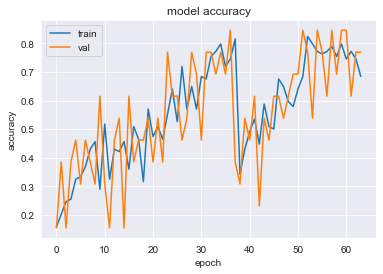

In [269]:
#train en plot het model
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=64)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

 ## e. (tussen)Resultaat
 De graph toont een stijging in accuracy, dit betekend dat er patterns worden gevonden die een voorspelling mogelijk maken.
 Er zijn binnen de dataset 8 species gedefinieerd, dus dat accuracy zal altijd op of boven de 12.5 procent zitten.

In [270]:
y_pred = model.predict(X_test) #maak voorspellingen op basis met het model

1/1 [==============================] - 0s 59ms/step


In [271]:
y_pred[:5]

array([[9.9999970e-01, 1.0000000e+00, 9.9999994e-01, 1.8311257e-11,
        1.0000000e+00, 1.0000000e+00, 2.2891676e-33],
       [8.5598499e-01, 4.9642465e-01, 9.3840979e-05, 9.9694067e-01,
        1.7428010e-04, 6.2797045e-10, 1.5979380e-33],
       [9.7705722e-01, 9.9979776e-01, 8.7420213e-01, 1.0699249e-04,
        9.9805719e-01, 4.9139661e-01, 7.1471539e-20],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.9233061e-17,
        1.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 4.9105597e-24,
        1.0000000e+00, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [272]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [273]:
from sklearn.metrics import classification_report

In [274]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.15      0.67      0.25         3
           1       0.20      1.00      0.33         2
           2       0.00      0.00      0.00         1
           3       0.80      0.80      0.80         5
           4       1.00      0.14      0.25        14
           5       0.00      0.00      0.00         6
           6       0.50      1.00      0.67         1

    accuracy                           0.34        32
   macro avg       0.38      0.52      0.33        32
weighted avg       0.61      0.34      0.30        32



C:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

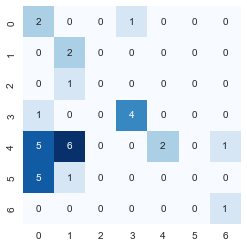

In [277]:
matrix_confusion = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

 ## d. conclusie

Het classificiation_report toont aan dat het bij de meeste species goed te voorspellen is welke waardes erbij horen.
Er zitten helaas ook minder succesvol voorspelbare species tussen. Dit kan eventueel opgelost worden door het model beter te specificeren.
De gemiddelde accuracy is meer dan 50%. Dit geeft aan dat de dataset niet compleet random is, maar dat veel waardes lastig te voorspellen zijn.

De confusion_matrix toont een patroon lopend van linksboven naar rechtsonder. Dit is bij een confusion matrix een goed resultaat.
Wel is er duidelijk een stuk te vinden waar veel foute voorspellingen plaatsvinden. Dit ligt waarschijnlijk aan de simplictischheid van het model, maar kan ook aan een gebrek van patronen binnen de dataset liggen.